<a href="https://colab.research.google.com/github/abhinavsenthil/AI_Milk_Fat_Prediction/blob/main/FinanceX_BackEnd/Stock_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Helper libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [ ]:
#Stocks retriever

Data_frame = web.DataReader('IBM', data_source='yahoo', start='1962-01-02', end='2020-11-10')
#print stock data
Data_frame

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1962-01-02,7.713333,7.626667,7.713333,7.626667,387200.0,1.850917
1962-01-03,7.693333,7.626667,7.626667,7.693333,288000.0,1.867095
1962-01-04,7.693333,7.613333,7.693333,7.616667,256000.0,1.848488
1962-01-05,7.606667,7.453333,7.606667,7.466667,363200.0,1.812086
1962-01-08,7.460000,7.266667,7.460000,7.326667,544000.0,1.778110
...,...,...,...,...,...,...
2020-11-04,113.910004,111.160004,112.330002,111.900002,5800100.0,110.300583
2020-11-05,115.290001,113.010002,113.300003,114.769997,4902200.0,113.129562
2020-11-06,115.099998,113.389999,115.080002,114.040001,5249200.0,112.409996


In [ ]:
#get number of rows and cols
Data_frame.shape

(10051, 6)

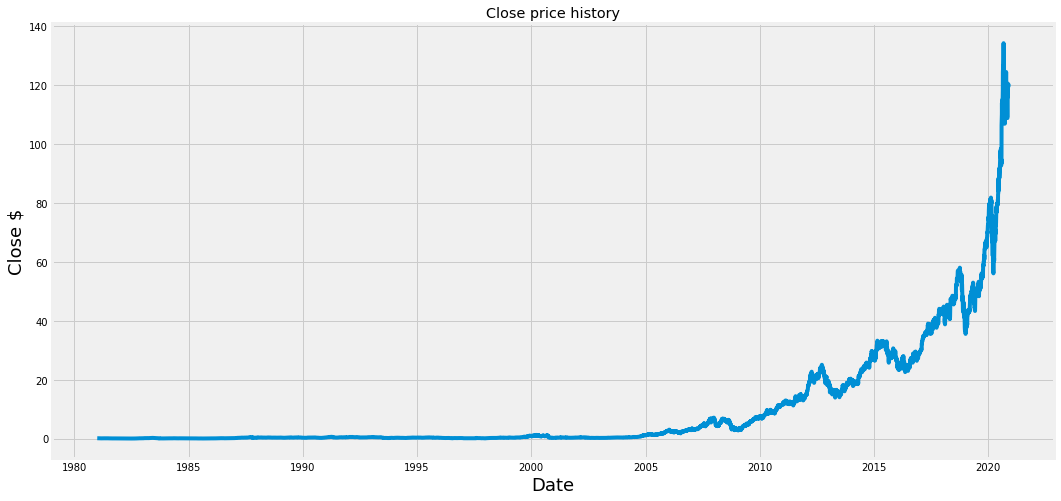

In [ ]:
#Visualise the closing price

plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(Data_frame['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close $', fontsize=18)
plt.show()

In [ ]:
#create a new data frame with only the close column

data = Data_frame.filter(['Close'])
dataset= data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)

training_data_len 


1603

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [ ]:
#create the training data set
train_data = scaled_data[0:training_data_len,:]
#split the data
x_train=[]
y_train=[]


for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [ ]:
#